In [3]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [4]:
feature_8 = pd.read_csv("feature_8.csv")
feature_9 = pd.read_csv("feature_9.csv")

feature_8 = feature_8[feature_8.data_date <= 20151231]
feature_9 = feature_9[feature_9.data_date <= 20151231]

In [5]:
def cal_rtn(series):
    num = len(series)
    list_temp = []
    ret_temp = 1
    for i in range(num):
        ret_temp *= (1+series[i])
        list_temp.append(ret_temp)
    return list_temp
def classificaiton_rtn(dataframe):
    date_list = sorted(list(set(dataframe.data_date)))
    df_init = []
    for i in range(len(date_list)):
        q1 = dataframe[dataframe.data_date == date_list[i]]
        factor_df_layers = pd.qcut(q1["d_syn"], 10, labels=False,duplicates = "drop")
        q1["layer"] = factor_df_layers
        rtn_temp = pd.DataFrame(q1.groupby("layer")["log_ret_1_x"].mean())
        if len(df_init) == 0:
            df_init = rtn_temp
        else:
            df_init = pd.concat([df_init,rtn_temp],axis = 1)
    return df_init

In [6]:
df_new = pd.merge(feature_9,feature_8 ,on = ["data_date","security_id"],how = "left")
df_new = df_new.dropna()[["data_date","security_id","d9","d8","log_ret_1_x"]]
df_new.index = range(len(df_new))


min_1 = np.min(df_new["d8"])
max_1=np.max(df_new["d8"])

def normalize_1(x):

    return (x - min_1) / (max_1 - min_1)

min_2 = np.min(df_new["d9"])
max_2=np.max(df_new["d9"])

def normalize_2(x):

    return (x - min_2) / (max_2 - min_2)


In [7]:
df_new["d8"] = df_new["d8"].apply(normalize_1)
df_new["d9"] = df_new["d9"].apply(normalize_2)

# try different weight

we set w from 0 to 1

In [8]:
w = 0.05
df_new["d_syn"] = -w*df_new["d9"]+(1-w)*df_new["d8"]

In [9]:
df = classificaiton_rtn(df_new)

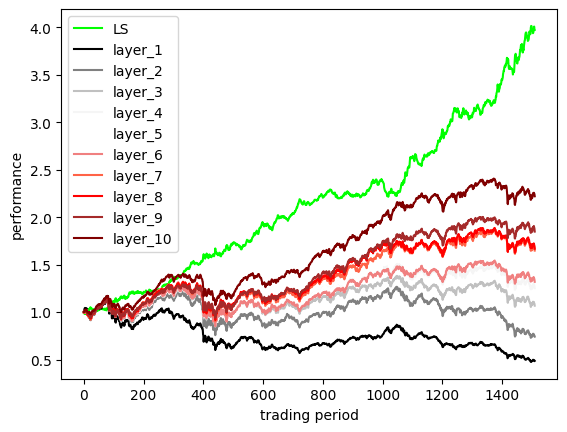

In [10]:
df_T = df.T
df_T = df_T.dropna()
df_T.index = range(len(df_T))
df_T["LS"] = np.exp(df_T[9.0])-np.exp(df_T[0.0])
df_T.index = range(len(df_T))
x = df_T.index
k1 = cal_rtn(df_T[0.0])
k2 = cal_rtn(df_T[1.0])
k3 = cal_rtn(df_T[2.0])
k4 = cal_rtn(df_T[3.0])
k5 = cal_rtn(df_T[4.0])
k6 = cal_rtn(df_T[5.0])
k7 = cal_rtn(df_T[6.0])
k8 = cal_rtn(df_T[7.0])
k9 = cal_rtn(df_T[8.0])
k10 = cal_rtn(df_T[9.0])
k11 = cal_rtn(df_T["LS"])
plt.plot(x,k11,color = 'lime',label="LS")


plt.plot(x,k1,color = 'black',label="layer_1")
plt.plot(x,k2,color = 'gray',label="layer_2")
plt.plot(x,k3,color = 'silver',label="layer_3")
plt.plot(x,k4,color = 'whitesmoke',label="layer_4")
plt.plot(x,k5,color = 'white',label="layer_5")
plt.plot(x,k6,color = 'lightcoral',label="layer_6")
plt.plot(x,k7,color = 'tomato',label="layer_7")
plt.plot(x,k8,color = 'red',label="layer_8")
plt.plot(x,k9,color = 'brown',label="layer_9")
plt.plot(x,k10,color = 'maroon',label="layer_10")
plt.xlabel("trading period")#横坐标名字
plt.ylabel("performance")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

no significant improve was found, so the synthetic was abandoned